# **Setting up Pyspark in Colab**

To run spark in Colab, You need proper setup. Next cell will create required setup for running Spark/PySpark:

In [1]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

# **Starting a spark session**

In [2]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

# Creates a Spark session using the local[*] master
spark = SparkSession.builder.master("local[*]").getOrCreate()

# **Uploading CSV file into a dataframe**

In [3]:
# Upload files to google colab
from google.colab import files
uploaded = files.upload()

Saving BostonHousing.csv to BostonHousing.csv


# **Read the given CSV file**

In [4]:
# Reading this uploaded file and use this data frame.
file_path = "/content/BostonHousing.csv"
df = spark.read.format("csv").options(header="true", inferSchema="true").load(file_path)

# **Show the first 5 elements of your dataset**

In [5]:
# Show the first five rows
df.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



# **Count number of observation in the given dataset**

In [6]:
# Counting number of rows in our dataset
df.count()

506

# **Show the Schema of your dataset**

In [7]:
# The schema provides information about the structure and data types of the columns in the DataFrame.
# Column name: Data type ( whether the column allows null values : true or false)
df.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



# **Drop the column "b" from your dataset**

In [9]:
# Drop a column
column_to_drop = "b"
df = df.drop(column_to_drop)

# Show the DataFrame
df.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



# **Round all of the numerical columns into two decimal place**

In [11]:
from pyspark.sql.functions import col, round

# List of columns to round (you can modify this list based on your dataset)
numerical_columns = [col_name for col_name, data_type in df.dtypes if data_type == "double"]

# Round numerical columns to two decimal places
for col_name in numerical_columns:
    df = df.withColumn(col_name, round(col(col_name), 2))

# Show the updated DataFrame
df.show()

+----+----+-----+----+----+----+-----+----+---+---+-------+-----+----+
|crim|  zn|indus|chas| nox|  rm|  age| dis|rad|tax|ptratio|lstat|medv|
+----+----+-----+----+----+----+-----+----+---+---+-------+-----+----+
|0.01|18.0| 2.31|   0|0.54|6.58| 65.2|4.09|  1|296|   15.3| 4.98|24.0|
|0.03| 0.0| 7.07|   0|0.47|6.42| 78.9|4.97|  2|242|   17.8| 9.14|21.6|
|0.03| 0.0| 7.07|   0|0.47|7.19| 61.1|4.97|  2|242|   17.8| 4.03|34.7|
|0.03| 0.0| 2.18|   0|0.46| 7.0| 45.8|6.06|  3|222|   18.7| 2.94|33.4|
|0.07| 0.0| 2.18|   0|0.46|7.15| 54.2|6.06|  3|222|   18.7| 5.33|36.2|
|0.03| 0.0| 2.18|   0|0.46|6.43| 58.7|6.06|  3|222|   18.7| 5.21|28.7|
|0.09|12.5| 7.87|   0|0.52|6.01| 66.6|5.56|  5|311|   15.2|12.43|22.9|
|0.14|12.5| 7.87|   0|0.52|6.17| 96.1|5.95|  5|311|   15.2|19.15|27.1|
|0.21|12.5| 7.87|   0|0.52|5.63|100.0|6.08|  5|311|   15.2|29.93|16.5|
|0.17|12.5| 7.87|   0|0.52| 6.0| 85.9|6.59|  5|311|   15.2| 17.1|18.9|
|0.22|12.5| 7.87|   0|0.52|6.38| 94.3|6.35|  5|311|   15.2|20.45|15.0|
|0.12|

# **Create a new column (Age10)  with 10% increasing of 'age' column**

In [13]:
# Create the 'Age10' column with a 10% increase in the 'age' column
df = df.withColumn("Age10", round(col("age") * 1.10, 2))  # Multiply 'age' by 1.10 for a 10% increase

# Show the DataFrame with the new 'Age10' column
df.show()

+----+----+-----+----+----+----+-----+----+---+---+-------+-----+----+------+
|crim|  zn|indus|chas| nox|  rm|  age| dis|rad|tax|ptratio|lstat|medv| Age10|
+----+----+-----+----+----+----+-----+----+---+---+-------+-----+----+------+
|0.01|18.0| 2.31|   0|0.54|6.58| 65.2|4.09|  1|296|   15.3| 4.98|24.0| 71.72|
|0.03| 0.0| 7.07|   0|0.47|6.42| 78.9|4.97|  2|242|   17.8| 9.14|21.6| 86.79|
|0.03| 0.0| 7.07|   0|0.47|7.19| 61.1|4.97|  2|242|   17.8| 4.03|34.7| 67.21|
|0.03| 0.0| 2.18|   0|0.46| 7.0| 45.8|6.06|  3|222|   18.7| 2.94|33.4| 50.38|
|0.07| 0.0| 2.18|   0|0.46|7.15| 54.2|6.06|  3|222|   18.7| 5.33|36.2| 59.62|
|0.03| 0.0| 2.18|   0|0.46|6.43| 58.7|6.06|  3|222|   18.7| 5.21|28.7| 64.57|
|0.09|12.5| 7.87|   0|0.52|6.01| 66.6|5.56|  5|311|   15.2|12.43|22.9| 73.26|
|0.14|12.5| 7.87|   0|0.52|6.17| 96.1|5.95|  5|311|   15.2|19.15|27.1|105.71|
|0.21|12.5| 7.87|   0|0.52|5.63|100.0|6.08|  5|311|   15.2|29.93|16.5| 110.0|
|0.17|12.5| 7.87|   0|0.52| 6.0| 85.9|6.59|  5|311|   15.2| 17.1

# **Plot histogram Age10 column on a 2D Plot**

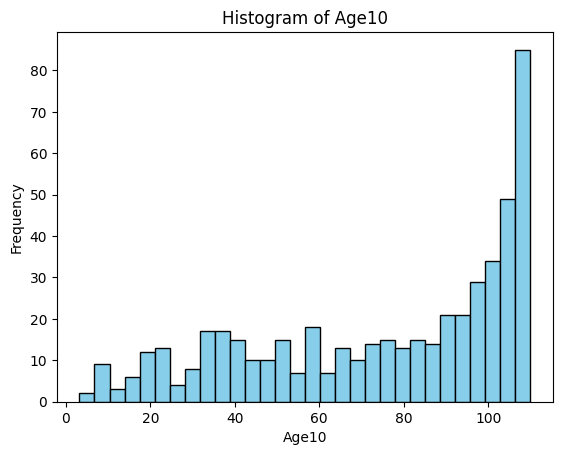

In [17]:
import matplotlib.pyplot as plt

# Collect the 'Age10' column data to a local list for plotting
age10_data = df.select("Age10").rdd.flatMap(lambda x: x).collect()

# Plot the histogram
plt.hist(age10_data, bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Age10")
plt.ylabel("Frequency")
plt.title("Histogram of Age10")
plt.show()

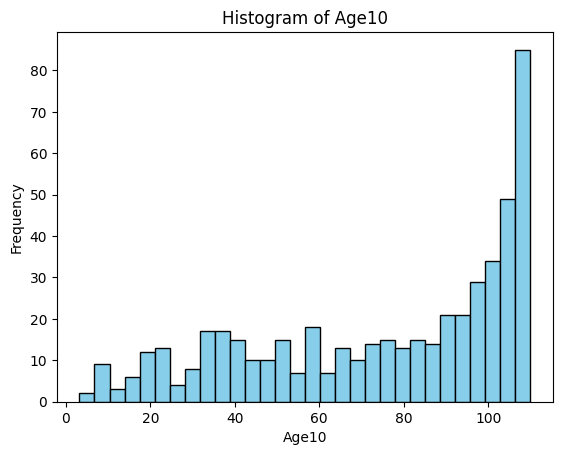

In [19]:
# Plot the histogram directly from the DataFrame
histogram = df.select("Age10").toPandas()
plt.hist(histogram["Age10"], bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Age10")
plt.ylabel("Frequency")
plt.title("Histogram of Age10")
plt.show()

# **Provide Summary Statistics of all columns (count, mean, stddev,min, max)**

In [20]:
# Use describe() to calculate summary statistics for all columns
summary = df.describe()

# Show the summary statistics
summary.show()

+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|summary|              crim|                zn|             indus|              chas|               nox|                rm|               age|               dis|              rad|               tax|           ptratio|             lstat|              medv|             Age10|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|  count|               506|               506|               506|               506|               506|               506|               506|               506|              

# **Convert  Spark Dataframe to Pandas Dataframe**

In [21]:
# We cant see directly last 5 rows like R, for that first we need to convert to pandas dataframe.
# Then in pandas we can use .tail function to see last rows.

# Convert the PySpark DataFrame to a Pandas DataFrame
pandas_df = df.toPandas()

# **Show the last 5 rows of Pandas DataFrame**

In [22]:
# Display the last 5 rows in tabular format
print(pandas_df.tail(5))

     crim   zn  indus  chas   nox    rm   age   dis  rad  tax  ptratio  lstat  \
501  0.06  0.0  11.93     0  0.57  6.59  69.1  2.48    1  273     21.0   9.67   
502  0.05  0.0  11.93     0  0.57  6.12  76.7  2.29    1  273     21.0   9.08   
503  0.06  0.0  11.93     0  0.57  6.98  91.0  2.17    1  273     21.0   5.64   
504  0.11  0.0  11.93     0  0.57  6.79  89.3  2.39    1  273     21.0   6.48   
505  0.05  0.0  11.93     0  0.57  6.03  80.8  2.51    1  273     21.0   7.88   

     medv   Age10  
501  22.4   76.01  
502  20.6   84.37  
503  23.9  100.10  
504  22.0   98.23  
505  11.9   88.88  
